In [13]:
# Install dependencies
%pip install -q amplpy

In [14]:
# Google Colab & Kaggle integration
from amplpy import AMPL, ampl_notebook

ampl = ampl_notebook(
    modules=["mosek"],  # modules to install
    license_uuid="default",  # license to use
)  # instantiate AMPL object and register magics

In [15]:
 %%writefile ExproctorRamlePasso1.mod
# Modelo matemático implementado!

# Definir variáveis antes!! E já colocar as nao negatividades antes de começar o modelo!
var F >=0;
var N >=0;
var M >=0;
var H >=0;

# Função-objetivo
maximize fo: M;

# Restrições:

# ELE NAO EH LINEAR POR CAUSA DA RAIZ!!!! (usa o solver mosek PARA NAO LINEAR)
subject to R1:
M = 4*sqrt(F) + 15*sqrt(N);

subject to R2:
100*F + 60*N <= 1000;

subject to R3:
H = 20*sqrt(F) + 4*sqrt(N);

Overwriting ExproctorRamlePasso1.mod


In [16]:
%%writefile ExproctorRamlePasso2.mod
# Modelo matemático implementado!

# Definir variáveis antes!! E já colocar as nao negatividades antes de começar o modelo!
var F >=0;
var N >=0;
var M >=0;
var H >=0;

# Função-objetivo
maximize fo: H;

# Restrições:

# ELE NAO EH LINEAR POR CAUSA DA RAIZ!!!! (usa o solver mosek PARA NAO LINEAR)
subject to R1:
M = 4*sqrt(F) + 15*sqrt(N);

subject to R2:
100*F + 60*N <= 1000;

subject to R3:
H = 20*sqrt(F) + 4*sqrt(N);

Overwriting ExproctorRamlePasso2.mod


In [17]:
%%ampl_eval
reset;
model ExproctorRamlePasso2.mod;
option solver mosek;
solve;
display M;
display H;
display N;
display F;

MOSEK 10.0.43: 
------------ WARNINGS ------------
WARNING.  2 case(s) of "PLApprox". One of them:
  An expression of type 'PowConstraint' has been piecewise-linearly approximated. Set cvt:plapprox:reltol to control precision (currently 0.010000).
MOSEK 10.0.43: optimal; objective 65.15599275
0 simplex iterations
1 branching nodes
 
------------ WARNINGS ------------
WARNING.  2 case(s) of "PLApprox". One of them:
  An expression of type 'PowConstraint' has been piecewise-linearly approximated. Set cvt:plapprox:reltol to control precision (currently 0.010000).
     [ sol:chk:feastol=1e-06, :feastolrel=1e-06, :inttol=1e-05,
       :round='', :prec='' ]
Algebraic expression violations:
  - 1 original expression(s) of type ':pow',
        up to 8E-03 (abs), up to 3E-03 (rel)
 
 
M = 27.5017

H = 65.156

N = 1.03847

F = 9.37692



In [18]:
%%ampl_eval
reset;
model ExproctorRamlePasso1.mod;
option solver mosek;
solve;
display M;
display H;
display N;
display F;

MOSEK 10.0.43: 
------------ WARNINGS ------------
WARNING.  2 case(s) of "PLApprox". One of them:
  An expression of type 'PowConstraint' has been piecewise-linearly approximated. Set cvt:plapprox:reltol to control precision (currently 0.010000).
MOSEK 10.0.43: optimal; objective 62.45961535
0 simplex iterations
1 branching nodes
 
------------ WARNINGS ------------
WARNING.  2 case(s) of "PLApprox". One of them:
  An expression of type 'PowConstraint' has been piecewise-linearly approximated. Set cvt:plapprox:reltol to control precision (currently 0.010000).
     [ sol:chk:feastol=1e-06, :feastolrel=1e-06, :inttol=1e-05,
       :round='', :prec='' ]
Algebraic expression violations:
  - 1 original expression(s) of type ':pow',
        up to 1E-03 (abs), up to 3E-04 (rel)
 
 
M = 62.4596

H = 31.1701

N = 15.6872

F = 0.587668



Passo 3

In [19]:
%%writefile ExproctorRamlePasso3.mod

var F >= 0;
var N >= 0;
var H >= 0;
var M >= 0;

param Minimo default 25;

#Função-objetivo
  maximize fo: H;

# Restrições:
subject to R1:
  H = 20*sqrt(F) + 4*sqrt(N);

subject to R2:
  M = 4*sqrt(F) + 15*sqrt(N);

subject to R3:
  100*F + 60*N <= 1000;

subject to R5:
  M >= Minimo;




Overwriting ExproctorRamlePasso3.mod


In [20]:
%%ampl_eval
reset;
model ExproctorRamlePasso3.mod;
option solver mosek;
for {i in 1..7} {
  solve;
  print "Iteração: ";
  display i;
  display M;
  display H;
  display N;
  display F;
  display M >> /content/saida.txt;
  display H >> /content/saida.txt;
  let Minimo := Minimo + 5;
  }

MOSEK 10.0.43: 
------------ WARNINGS ------------
WARNING.  2 case(s) of "PLApprox". One of them:
  An expression of type 'PowConstraint' has been piecewise-linearly approximated. Set cvt:plapprox:reltol to control precision (currently 0.010000).
MOSEK 10.0.43: optimal; objective 65.15599275
0 simplex iterations
1 branching nodes
 
------------ WARNINGS ------------
WARNING.  2 case(s) of "PLApprox". One of them:
  An expression of type 'PowConstraint' has been piecewise-linearly approximated. Set cvt:plapprox:reltol to control precision (currently 0.010000).
     [ sol:chk:feastol=1e-06, :feastolrel=1e-06, :inttol=1e-05,
       :round='', :prec='' ]
Algebraic expression violations:
  - 1 original expression(s) of type ':pow',
        up to 8E-03 (abs), up to 3E-03 (rel)
 
 
Iteração: 
i = 1

M = 27.5017

H = 65.156

N = 1.03847

F = 9.37692

MOSEK 10.0.43: 
------------ WARNINGS ------------
WARNING.  2 case(s) of "PLApprox". One of them:
  An expression of type 'PowCo

In [23]:
%%ampl_eval
reset;
option solver mosek;
model ExproctorRamlePasso3.mod;
let Minimo := 0;
solve;
display M >> /content/saida.txt;
display H >> /content/saida.txt;
let Minimo := 30;
for {i in 1..7} {
  solve;
  display M >> /content/saida.txt;
  display H >> /content/saida.txt;
  let Minimo := Minimo + 5;
}
let Minimo := 62.4596;
solve;
display M >> /content/saida.txt;
display H >> /content/saida.txt;

MOSEK 10.0.43: 
------------ WARNINGS ------------
WARNING.  2 case(s) of "PLApprox". One of them:
  An expression of type 'PowConstraint' has been piecewise-linearly approximated. Set cvt:plapprox:reltol to control precision (currently 0.010000).
MOSEK 10.0.43: optimal; objective 65.15599275
0 simplex iterations
1 branching nodes
 
------------ WARNINGS ------------
WARNING.  2 case(s) of "PLApprox". One of them:
  An expression of type 'PowConstraint' has been piecewise-linearly approximated. Set cvt:plapprox:reltol to control precision (currently 0.010000).
     [ sol:chk:feastol=1e-06, :feastolrel=1e-06, :inttol=1e-05,
       :round='', :prec='' ]
Algebraic expression violations:
  - 1 original expression(s) of type ':pow',
        up to 8E-03 (abs), up to 3E-03 (rel)
 
 
MOSEK 10.0.43: 
------------ WARNINGS ------------
WARNING.  2 case(s) of "PLApprox". One of them:
  An expression of type 'PowConstraint' has been piecewise-linearly approximated. Set cvt:plapprox:

[27.5017 30.     35.     40.     45.     50.     55.     60.     62.4596]
[65.156  65.1428 64.4223 62.9035 60.9032 57.7286 52.3225 42.5579 31.1704]


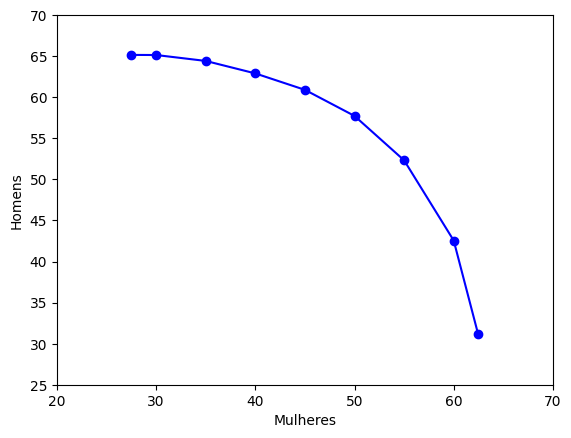

In [36]:
import matplotlib.pyplot as plt
import numpy as np

text_file = open("/content/saida.txt", "r") #abre o txt
d1 = text_file.read() #le os dados
text_file.close() #fecha o txt
d2=d1.replace('\n\n','\n') # remove enter duplos
d2=d2.replace('M =' , '') # remove strings M =
d2=d2.replace('H =' , '') # remove strings H=
d3=d2.split('\n') #quebra o conteudo em list
d3.remove('') #remove espaços vazios
x1 = np.empty([]) #declara x1
x2 = np.empty([]) #declara x2
x1 = float(d3[0]) #x1 e x2 recebe valores alternados de d3
x2 = float(d3[1])
for i in range (2,len(d3)-1,2) :
  x1= np.append(x1,float(d3[i]))
  x2= np.append(x2,float(d3[i+1]))
print (x1)
print (x2)
plt.plot(x1,x2, 'bo',linestyle='solid') #declara o grafico
plt.xlabel("Mulheres") #nome do eixo da mulher
plt.ylabel("Homens") #nome do eixo do homem
plt.axis((20,70,25,70)) #define amplitude do eixo
plt.show()